The chi-squared distribution is one of the most widely used probability distributions in inferential statistics, notably in hypothesis testing and in construction of confidence intervals.

In this first is to generate null hypothesis (Related) and alternate hypothesis (Not Related)


In [4]:
import numpy as np

# Parameters
df = 2  # degrees of freedom
size = 1000  # sample size

# Generate Chi-Squared distributed data
chi_squared_data = np.random.chisquare(df, size)

# Display the first 10 values
chi_squared_data[:10]


array([1.31220998, 1.53160004, 0.42628255, 2.97366498, 2.53643113,
       1.3478413 , 1.70936785, 0.38878091, 0.02350322, 1.07598801])

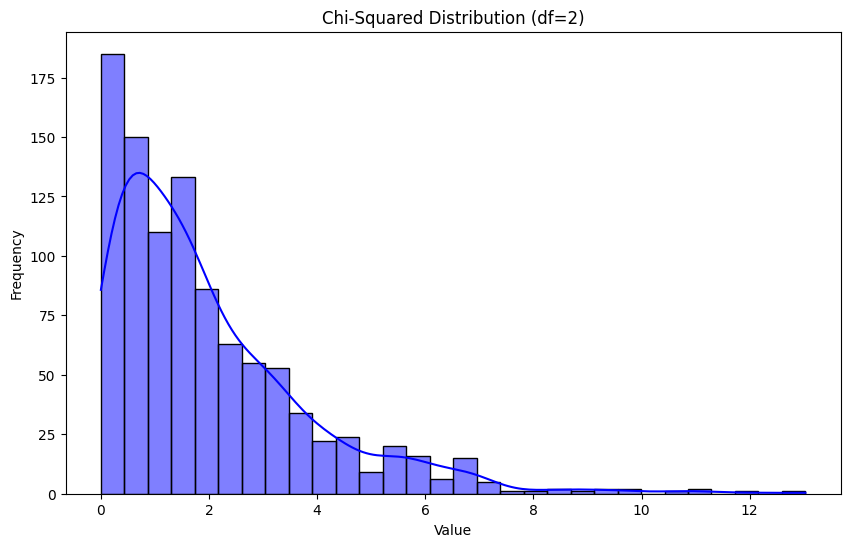

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Chi-Squared distribution
plt.figure(figsize=(10, 6))
sns.histplot(chi_squared_data, bins=30, kde=True, color='blue')
plt.title('Chi-Squared Distribution (df=2)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [11]:
import pandas as pd

# Create the data
data = {'Class': ['I UG','I UG', 'II UG','II UG', 'III UG','III UG', 'PG','PG'],
        'Favouring_autonomous': ['Yes', 'No', 'Yes', 'No','Yes', 'No','Yes', 'No'],
        'Count': [120, 80, 130, 70, 70, 30, 80, 20]}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Class'], df['Favouring_autonomous'], values=df['Count'], aggfunc='sum')
print(contingency_table)


Favouring_autonomous  No  Yes
Class                        
I UG                  80  120
II UG                 70  130
III UG                30   70
PG                    20   80


For understanding chisquared please refer additionaly on row related frequency, column related frequency and Expected Value

In [12]:
from scipy.stats import chi2_contingency

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")


Chi-Squared Statistic: 12.75
p-value: 0.005209652188112748
Degrees of Freedom: 3
Expected Frequencies: 
[[ 66.66666667 133.33333333]
 [ 66.66666667 133.33333333]
 [ 33.33333333  66.66666667]
 [ 33.33333333  66.66666667]]


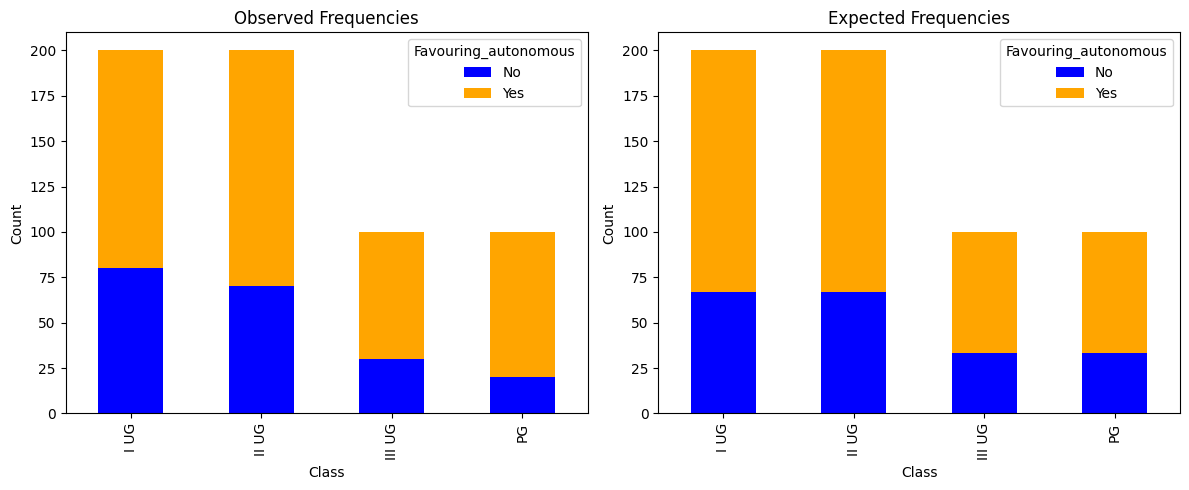

In [13]:
# Convert the expected frequencies to a DataFrame
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Plot the observed and expected frequencies
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Observed Frequencies
contingency_table.plot(kind='bar', stacked=True, ax=ax[0], color=['blue', 'orange'])
ax[0].set_title('Observed Frequencies')
ax[0].set_ylabel('Count')

# Expected Frequencies
expected_df.plot(kind='bar', stacked=True, ax=ax[1], color=['blue', 'orange'])
ax[1].set_title('Expected Frequencies')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [14]:
expected_df

Favouring_autonomous,No,Yes
Class,,
I UG,66.666667,133.333333
II UG,66.666667,133.333333
III UG,33.333333,66.666667
PG,33.333333,66.666667
